In [1]:
import json
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
g = nx.Graph()
subjects = set()
for year in range(1994, 2004):
    with open(f"data/papers_{year}.json", "r") as f:
        papers = json.load(f)
        for paper in papers:
            authors = paper["authors"]
            if "this http URL" in authors: authors.remove("this http URL")
            for author in authors:
                if not g.has_node(author):
                    g.add_node(author)
            n = len(authors)
            for i in range(n):
                for j in range(i+1, n):
                    g.add_edge(authors[i], authors[j])
            subjects.add(paper["subject"])

In [4]:
print(len(g))
for node in [*g.nodes]:
    if g.degree[node] == 0:
        g.remove_node(node)
print(len(g))

16330
15028


In [5]:
print(f"Number of connected components: {nx.number_connected_components(g)}")
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
print(f"\t #nodes in 1st connect compoent: {len(g.subgraph(gcc[0]))}")
print(f"\t #nodes in 2nd connect compoent: {len(g.subgraph(gcc[1]))}")
print(f"\t #nodes in 3rd connect compoent: {len(g.subgraph(gcc[2]))}")
print(f"\t #nodes in 4th connect compoent: {len(g.subgraph(gcc[3]))}")

Number of connected components: 2536
	 #nodes in 1st connect compoent: 1291
	 #nodes in 2nd connect compoent: 482
	 #nodes in 3rd connect compoent: 153
	 #nodes in 4th connect compoent: 149


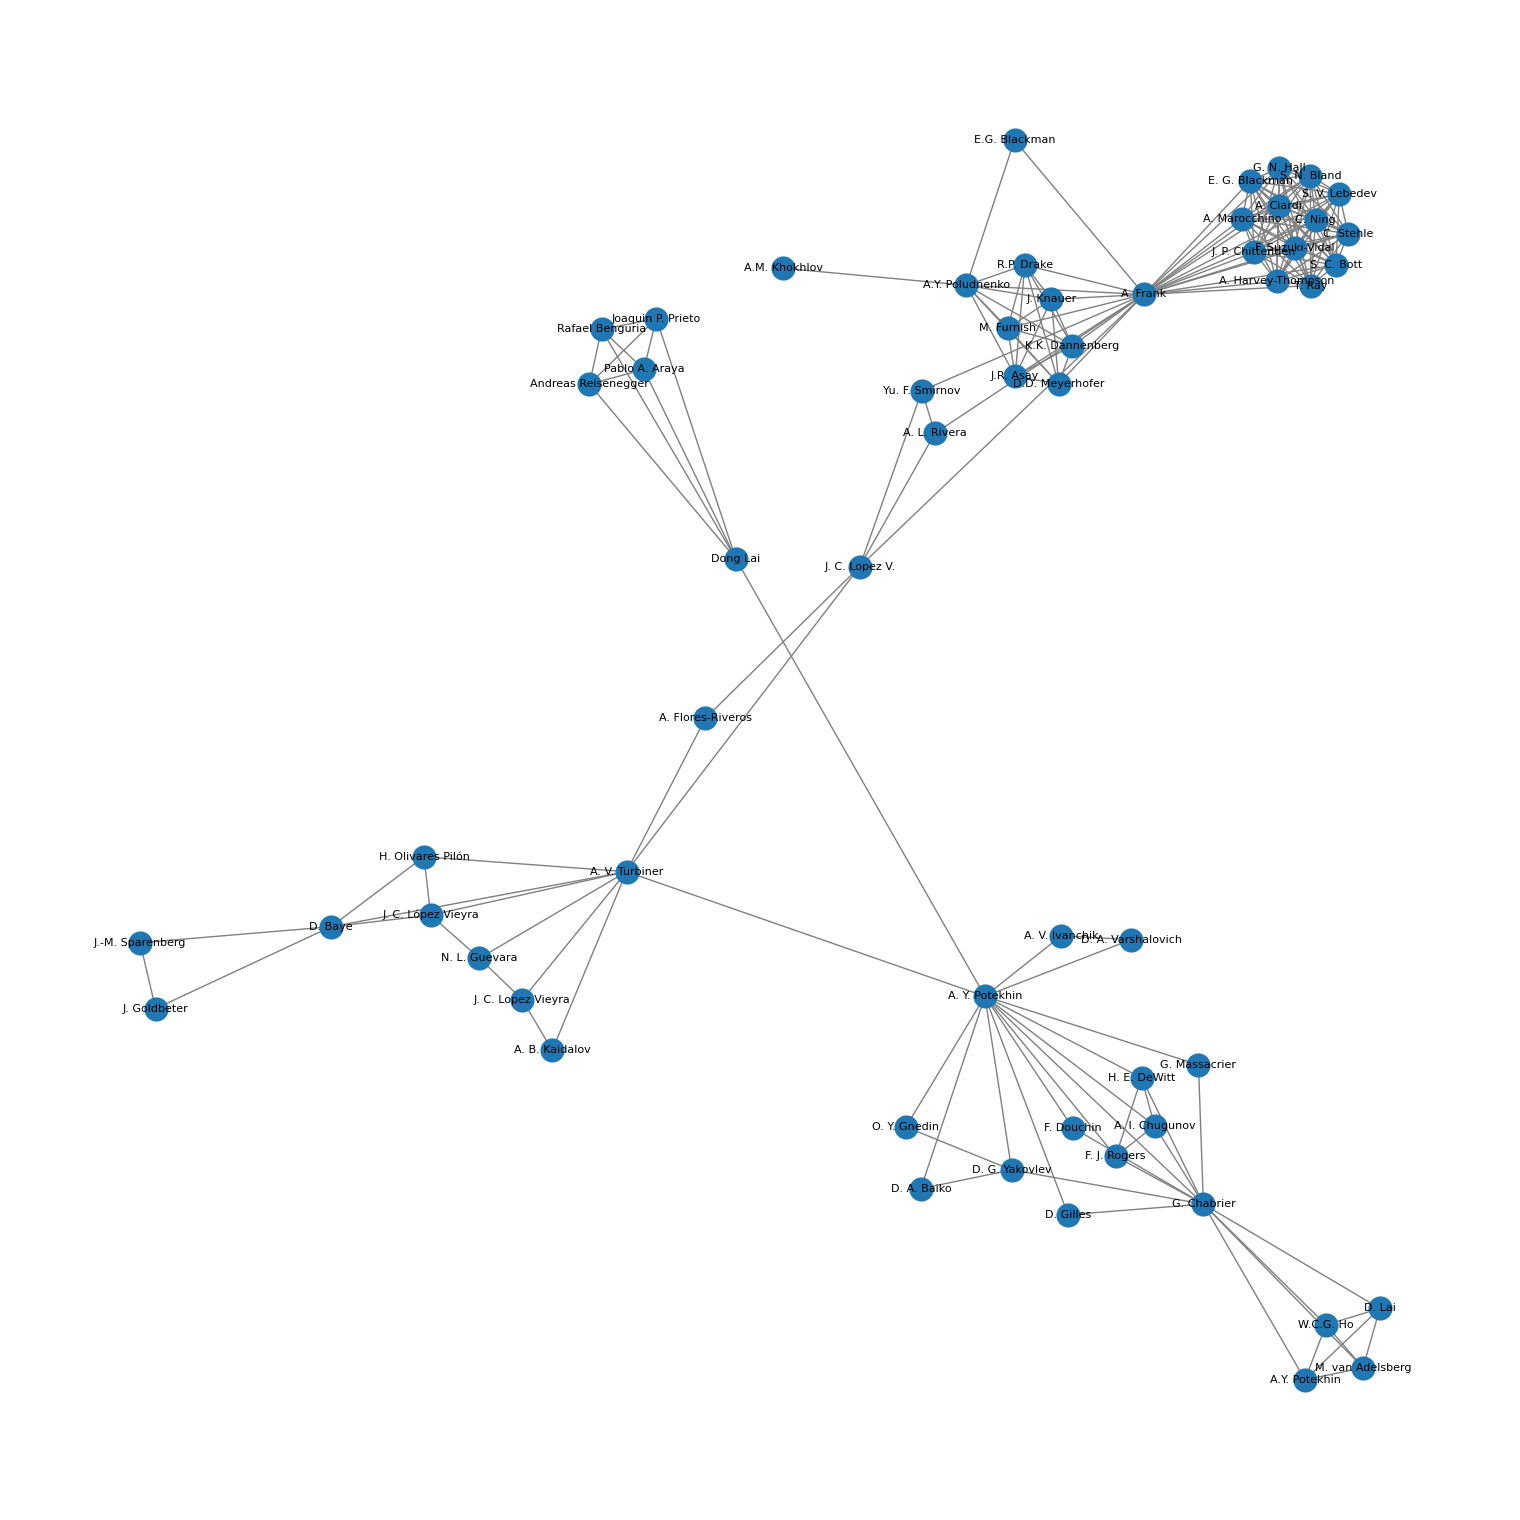

In [11]:
draw_g = g.subgraph(gcc[5])

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(draw_g)
nx.draw(draw_g,
        pos=pos,
        font_size=8,
        with_labels=True,
        edge_color="gray", 
        linewidths=0.05) 

"""
nx.draw(g, 
        with_labels=True, 
        node_size=100, 
        node_color="skyblue", 
        font_size=8, 
        font_color="black", 
        font_weight="bold", 
        edge_color="gray", 
        linewidths=0.05)
"""
plt.show()

In [11]:
gpcc = g.subgraph(gcc[0]) # Grafo primario

with open(f"data/authors_2000_to_2010.json", "r") as f:
    authors = json.load(f)

with open("nodes.csv", "w") as nodes, open("edges.csv", "w") as edges:
    nodeswriter = csv.writer(nodes, delimiter=";")
    nodeswriter.writerow(["id", "n", "primary_subject"])
    edgeswriter = csv.writer(edges, delimiter=';')
    edgeswriter.writerow(["Source", "Target"])

    new_authors = {}
    for u,v in gpcc.edges:
        edgeswriter.writerow([u,v])
        new_authors[u] = authors[u]
        new_authors[v] = authors[v]
    for author, subjects in new_authors.items():
        n = sum([i for i in subjects.values()])
        
        v = sorted(subjects.values(), reverse=True)
        if len(v) == 1 or v[1]/v[0] <= 0.5: # Then we assume that he/she has a primary subject.
            ps = max(subjects, key=subjects.get) 
        else:
            ps = "No primary subject"
        
        nodeswriter.writerow([author, n, ps])